In [1]:
import imp
import os
import pickle

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import h5py

import util
from plot_core import PlotAx, STYLE_PATH
from util import *
from plot_model_training import *

%matplotlib inline
matplotlib.rcParams['agg.path.chunksize'] = 10000

/home/cali/bin/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

from keras import models
from keras import layers

Using TensorFlow backend.


In [3]:
style_file = os.path.join(STYLE_PATH, 'plot_regression.mplstyle')
plt.style.use(style_file)

In [4]:
in_dir = '/home/cali/data/GapFilling/CRISFull/'
pic_dir = 'Picture/'
result_dir = 'Result/'
data_dir = 'Data/'
model_dir = 'Model'
for _dir in [pic_dir, pic_dir, result_dir, data_dir, model_dir]:
    if not os.path.isdir(_dir):
        os.makedirs(_dir)

# 合成全部的CRIS_full数据

In [5]:
filenames = os.listdir(in_dir)
in_files = [os.path.join(in_dir, filename) for filename in filenames]
in_files.sort()

cris_full_data_file = os.path.join(data_dir, 'CRIS_full_data.hdf')
if not os.path.isfile(cris_full_data_file):
    combine_cris_full_data(in_files, cris_full_data_file)

# 加载全部波段数据

In [6]:
X_all, Y_all = load_cris_full_combine_data(cris_full_data_file, None)

(1217148, 2211) (1217148, 1158)


In [7]:
print(type(X_all))
print(type(Y_all))

print(X_all.shape)
print(Y_all.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1217148, 2211)
(1217148, 1158)


In [8]:
# 判断是否有小于0和等于nan的无效值
print(np.where(X_all<=0)[0].shape)
print(np.where(Y_all<=0)[0].shape)

print(np.where(np.isnan(X_all))[0].shape)
print(np.where(np.isnan(Y_all))[0].shape)

print(np.where(X_all<=0)[0].shape)
print(np.where(Y_all<=0)[0].shape)

print(np.where(np.isnan(X_all))[0].shape)
print(np.where(np.isnan(Y_all))[0].shape)

(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)


In [9]:
# 所有测量通道和预测通道每一波段的范围和分辨率 (start, end, frequency)
ranges_X_all = [(650., 1095., 0.625), (1210., 1750., 0.625), (2155., 2550., 0.625), ]
ranges_Y_all = [(1095.625, 1209.375, 0.625), (1750.625, 2154.375, 0.625), (2550.625, 2755., 0.625), ]

# 当前测量通道和预测通道每一波段的范围和分辨率 (start, end, frequency)
ranges_X = ranges_X_all
# ranges_X = [(650., 1095, 0.625), ]
# ranges_X = [(1210., 1750, 0.625), ]
# ranges_X = [(2155., 2550., 0.625), ]
ranges_Y = ranges_Y_all
# ranges_Y = [(1095.625, 1209.375, 0.625), ]
# ranges_Y = [(1750.625, 2154.375, 0.625), ]
# ranges_Y = [(2550.625, 2755., 0.625), ]

# 加载预测波段的数据

In [10]:
data = load_train_data_from_all(X_all, Y_all, ranges_X_all, ranges_Y_all, ranges_X, ranges_Y)

In [11]:
train_X = data['train_X']
test_X = data['test_X']
train_Y = data['train_Y']
test_Y = data['test_Y']
wavenumber_X = data['wavenumber_X']
wavenumber_Y = data['wavenumber_Y']
index_X = data['index_X']
index_Y = data['index_Y']

In [12]:
print(index_X)
print(index_Y)

[[   0  713]
 [ 713 1578]
 [1578 2211]]
[[   0  183]
 [ 183  830]
 [ 830 1158]]


In [13]:
print(type(train_X))
print(type(test_X))
print(type(train_Y))
print(type(test_Y))
print(type(wavenumber_X))
print(type(wavenumber_Y))
print(type(index_X))
print(type(index_Y))

print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)
print(wavenumber_X.shape)
print(wavenumber_Y.shape)
print(index_X.shape)
print(index_Y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(973718, 2211)
(243430, 2211)
(973718, 1158)
(243430, 1158)
(2211,)
(1158,)
(3, 2)
(3, 2)


In [14]:
print(np.where(train_X<=0)[0].shape)
print(np.where(test_X<=0)[0].shape)
print(np.where(train_Y<=0)[0].shape)
print(np.where(test_Y<=0)[0].shape)

print(np.where(np.isnan(train_X))[0].shape)
print(np.where(np.isnan(test_X))[0].shape)
print(np.where(np.isnan(train_Y))[0].shape)
print(np.where(np.isnan(test_Y))[0].shape)

(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)


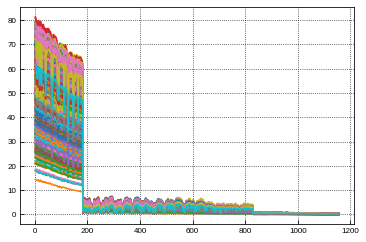

In [15]:
for i in range(500, 1000):
    plt.plot(test_Y[i])

In [26]:
from sklearn.linear_model import Ridge
# lin_reg = Ridge()
lin_reg = LinearRegression()
lin_reg.fit(train_X, train_Y)
predict_Y_linear = lin_reg.predict(test_X)
lin_reg.coef_.T.shape

(2211, 1158)

In [23]:
def save_linear_model_attributes(coeff, intercept, out_file):
    """
    保存线性模型的属性
    :param coeff: 
    :param intercept: 
    :param out_file: 
    :return: 
    """
    compression = 'gzip'  # 压缩算法种类
    compression_opts = 1  # 压缩等级
    shuffle = True
    with h5py.File(out_file, 'w') as hdf5:
        hdf5.create_dataset('P0',
                            dtype=np.float32, data=coeff, compression=compression,
                            compression_opts=compression_opts,
                            shuffle=shuffle)
        hdf5.create_dataset('C0',
                            dtype=np.float32, data=intercept, compression=compression,
                            compression_opts=compression_opts,
                            shuffle=shuffle)

In [27]:
model_attribute_file = 'Model/linear_model_attribute_test.h5'
coeff = lin_reg.coef_.T
intercept = lin_reg.intercept_.T
save_linear_model_attributes(coeff, intercept, model_attribute_file)

In [18]:
mae = mean_absolute_error(test_Y, predict_Y_linear)
mse = mean_squared_error(test_Y, predict_Y_linear)
print(mae)
print(mse)

0.029103557
0.003530571


In [20]:
linear_model_attribute_file = os.path.join(model_dir, 'bussiness_coeff.h5')
coef, intercept = get_linear_model_attributes(linear_model_attribute_file)

In [21]:
lin_reg.coef_ = coef.T
lin_reg.intercept_ = intercept.T
predict_Y_linear = lin_reg.predict(test_X)

In [22]:
mae = mean_absolute_error(test_Y, predict_Y_linear)
mse = mean_squared_error(test_Y, predict_Y_linear)
print(mae)
print(mse)

0.2103611
0.28611746


In [ ]:
# 去除预测结果中含无效值（<=0）的光谱
predict_Y_linear_tmp = predict_Y_linear.copy()
test_Y_linear_tmp = test_Y.copy()
predict_Y_linear_tmp = pd.DataFrame(predict_Y_linear_tmp)
test_Y_linear_tmp = pd.DataFrame(test_Y_linear_tmp)
print(predict_Y_linear_tmp.shape)
print(test_Y_linear_tmp.shape)
index = predict_Y_linear_tmp <=0
predict_Y_linear_tmp[index] = np.nan
test_Y_linear_tmp[index] = np.nan
predict_Y_linear_tmp = predict_Y_linear_tmp.dropna(axis=0)
test_Y_linear_tmp = test_Y_linear_tmp.dropna(axis=0)
print(predict_Y_linear_tmp.shape)
print(test_Y_linear_tmp.shape)

predict_Y_linear_tmp = np.array(predict_Y_linear_tmp)
test_Y_linear_tmp = np.array(test_Y_linear_tmp)

In [ ]:
out_file = '0000_' + '_'.join([str(j) for i in (ranges_X + ranges_Y) for j in i]) + '.png'

result_dir = 'Result/' + '_'.join([str(j) for i in (ranges_X + ranges_Y) for j in i]) + '_linear'
if not os.path.isdir(result_dir):
    os.mkdir(result_dir)

out_file = os.path.join(result_dir, out_file)
test_tbb = rad2tbb(test_Y_linear_tmp, wavenumber_Y)
predict_tbb = rad2tbb(predict_Y_linear_tmp, wavenumber_Y)

plot_model_validate(test_tbb, predict_tbb, wavenumber_Y, index_Y, out_file)

In [ ]:
test_X_tbb_linear = rad2tbb(test_X, wavenumber_X)
test_Y_tbb_linear = rad2tbb(test_Y, wavenumber_Y)
predict_Y_tbb_linear = rad2tbb(predict_Y_linear, wavenumber_Y)

In [ ]:
alpha = 0.7

result_dir = 'Result/' + '_'.join([str(j) for i in (ranges_X + ranges_Y) for j in i]) + "_dnn"
if not os.path.isdir(result_dir):
    os.mkdir(result_dir)

file_name = result_dir + '/s_{:04d}_{:02d}.png'

figsize1 = (6.4, 2.5)
figsize2 = (6.4, 1.5)

for data_number in range(0, 10):
    count = 0
    fig = plt.figure(figsize=figsize1, dpi=150)
    plot_true_label = False
    plot_predict_label = False
    for s, e in index_X:
        plt.plot(wavenumber_X[s: e], test_X_tbb_linear[data_number][s: e], c='b', alpha=alpha)
    for s, e in index_Y:
        if plot_true_label:
            label=None
        else:
            label='true'
        plt.plot(wavenumber_Y[s: e], test_Y_tbb_linear[data_number][s: e], c='b', alpha=alpha, label=label)
        plot_true_label = True
    for s, e in index_Y:
        if plot_predict_label:
            label=None
        else:
            label='predict'
        plt.plot(wavenumber_Y[s: e], test_Y_tbb_linear[data_number][s: e], c='r', alpha=alpha, label=label)
        plot_predict_label = True
    plt.xlabel('Wavenumber($cm^{-1}$)')
    plt.ylabel('TBB ($K$)')
    plt.legend()
    plt.show()
    fig.savefig(file_name.format(data_number, count), dpi=150)
    print(file_name.format(data_number, count))
    count += 1

    fig = plt.figure(figsize=figsize2, dpi=150)
    for s, e in index_Y:
        tbb_bias = predict_Y_tbb_linear[data_number][s: e] - test_Y_tbb_linear[data_number][s: e]
        plt.scatter(wavenumber_Y[s: e], tbb_bias, s=0.1)
        plt.xlabel('Wavenumber($cm^{-1}$)')
        plt.ylabel('TBB Bias($K$)')
    plt.show()
    fig.savefig(file_name.format(data_number, count), dpi=150)
    print(file_name.format(data_number, count))
    count += 1
    
    for s, e in index_Y:
        fig = plt.figure(figsize=figsize1, dpi=150)
        plt.plot(wavenumber_Y[s: e], test_Y_tbb_linear[data_number][s: e], c='b', alpha=alpha, label='true')
        plt.plot(wavenumber_Y[s: e], predict_Y_tbb_linear[data_number][s: e], c='r', alpha=alpha, label='predict')
        plt.xlabel('Wavenumber($cm^{-1}$)')
        plt.ylabel('TBB ($K$)')
        plt.legend()
        plt.show()
        fig.savefig(file_name.format(data_number, count), dpi=150)
        print(file_name.format(data_number, count))
        count += 1

# 验证PCA效果

In [12]:
# from sklearn.decomposition import PCA
# X = np.concatenate((train_X, test_X), axis=0)
# model_pca = PCA()
# model_pca.fit(X)
# ratio_cumsm = np.cumsum(model_pca.explained_variance_ratio_)

# train_X_pca = model_pca.transform(train_X)
# test_X_pca = model_pca.transform(test_X)

In [13]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# n_all = list()
# mae_all = list()
# mse_all = list()

# for n in range(11, 211, 10):

#     train_X_pca_n = train_X_pca[:, :n]
#     test_X_pca_n = test_X_pca[:, :n]

# #     print(train_X_pca_n.shape, train_Y.shape)
# #     print(test_X_pca_n.shape, test_Y.shape)
#     lin_reg = LinearRegression()
#     lin_reg.fit(train_X_pca_n, train_Y)
#     predict_Y = lin_reg.predict(test_X_pca_n)

#     mae = mean_absolute_error(test_Y, predict_Y)
#     mse = mean_squared_error(test_Y, predict_Y)

#     n_all.append(n)
#     mae_all.append(mae)
#     mse_all.append(mse)

# n_all2 = list()
# mae_all2 = list()
# mse_all2 = list()
    
# for n in range(211, 2211+1, 200):

#     train_X_pca_n = train_X_pca[:, :n]
#     test_X_pca_n = test_X_pca[:, :n]

# #     print(train_X_pca_n.shape, train_Y.shape)
# #     print(test_X_pca_n.shape, test_Y.shape)
#     lin_reg = LinearRegression()
#     lin_reg.fit(train_X_pca_n, train_Y)
#     predict_Y = lin_reg.predict(test_X_pca_n)

#     mae = mean_absolute_error(test_Y, predict_Y)
#     mse = mean_squared_error(test_Y, predict_Y)

#     n_all2.append(n)
#     mae_all2.append(mae)
#     mse_all2.append(mse)

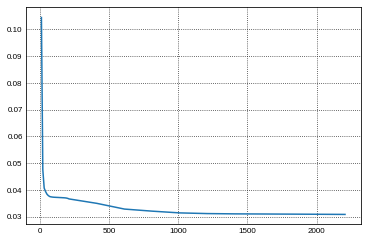

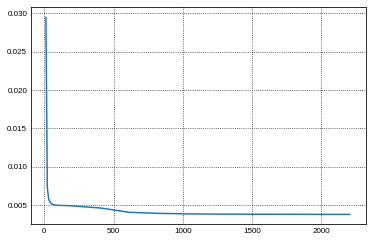

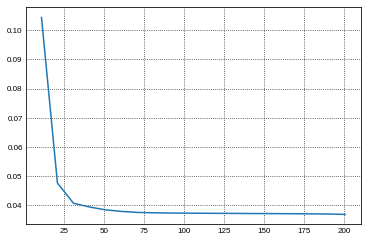

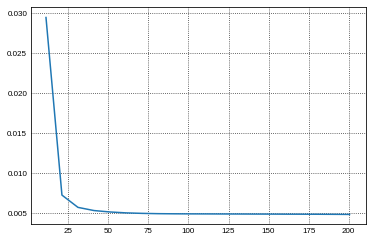

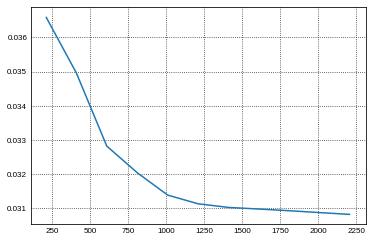

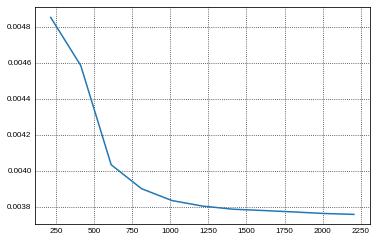

In [18]:
# result_dir = 'Result/' + '_'.join([str(j) for i in (ranges_X + ranges_Y) for j in i])
# if not os.path.isdir(result_dir):
#     os.mkdir(result_dir)

# file_name = result_dir + '/0000_mae_00.png'
# fig = plt.figure()
# plt.plot(n_all+n_all2, mae_all+mae_all2)
# plt.show()
# fig.savefig(file_name)
# file_name = result_dir + '/0000_mse_00.png'
# fig = plt.figure()
# plt.plot(n_all+n_all2, mse_all+mse_all2)
# plt.show()
# fig.savefig(file_name)
    
# file_name = result_dir + '/0000_mae_01.png'
# fig = plt.figure()
# plt.plot(n_all, mae_all)
# plt.show()
# fig.savefig(file_name)
# file_name = result_dir + '/0000_mse_01.png'
# fig = plt.figure()
# plt.plot(n_all, mse_all)
# plt.show()
# fig.savefig(file_name)

# file_name = result_dir + '/0000_mae_02.png'
# fig = plt.figure()
# plt.plot(n_all2, mae_all2)
# plt.show()
# fig.savefig(file_name)
# file_name = result_dir + '/0000_mse_02.png'
# fig = plt.figure()
# plt.plot(n_all2, mse_all2)
# plt.show()
# fig.savefig(file_name)

In [27]:
# model_pca.components_.T.shape

# 神经网络模型

In [97]:
train_X_nn = train_X.copy()
test_X_nn = test_X.copy()
print(train_X_nn.shape)
print(test_X_nn.shape)
X_mean = train_X_nn.mean()
X_std = train_X_nn.std()
train_X_nn -= X_mean
train_X_nn /= X_std
test_X_nn -= X_mean
test_X_nn /= X_std
print(train_X_nn.shape)
print(test_X_nn.shape)
a = 0.0701

(2421661, 2211)
(605416, 2211)
(2421661, 2211)
(605416, 2211)


In [99]:


def build_model():
    model = models.Sequential()
    model.add(layers.Dense(2211, activation='elu', input_shape=(2211,), kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1024, activation='elu', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1024, activation='elu', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1024, activation='elu', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1024, activation='elu', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='elu', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='elu', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='elu', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256, activation='elu', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256, activation='elu', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1158))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model
model = build_model()
print(model.summary())

num_epochs = 100
batch_size = 1024
history = model.fit(train_X_nn, train_Y, epochs=num_epochs, batch_size=batch_size, validation_data=(test_X_nn, test_Y))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 2211)              4890732   
_________________________________________________________________
batch_normalization_31 (Batc (None, 2211)              8844      
_________________________________________________________________
dropout_1 (Dropout)          (None, 2211)              0         
_________________________________________________________________
dense_65 (Dense)             (None, 1024)              2265088   
_________________________________________________________________
batch_normalization_32 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_66 (Dense)             (None, 1024)              1049600   
__________

Epoch 22/100
2421661/2421661 [==============================] - 152s 63us/step - loss: 1.1944 - mean_absolute_error: 0.5069 - val_loss: 0.2685 - val_mean_absolute_error: 0.2825
Epoch 23/100
2421661/2421661 [==============================] - 153s 63us/step - loss: 1.1691 - mean_absolute_error: 0.5020 - val_loss: 0.3200 - val_mean_absolute_error: 0.3081
Epoch 24/100
2421661/2421661 [==============================] - 153s 63us/step - loss: 1.1515 - mean_absolute_error: 0.4992 - val_loss: 0.3839 - val_mean_absolute_error: 0.3223
Epoch 25/100
2421661/2421661 [==============================] - 153s 63us/step - loss: 1.1237 - mean_absolute_error: 0.4941 - val_loss: 0.2753 - val_mean_absolute_error: 0.2854
Epoch 26/100
2421661/2421661 [==============================] - 153s 63us/step - loss: 1.1038 - mean_absolute_error: 0.4907 - val_loss: 0.3033 - val_mean_absolute_error: 0.3060
Epoch 27/100
2421661/2421661 [==============================] - 153s 63us/step - loss: 1.0844 - mean_absolute_error

In [109]:
num_epochs = 400
batch_size = 1024
history = model.fit(train_X_nn, train_Y, epochs=num_epochs, batch_size=batch_size, validation_data=(test_X_nn, test_Y))

Train on 2421661 samples, validate on 605416 samples
Epoch 1/400
2421661/2421661 [==============================] - 153s 63us/step - loss: 0.3997 - mean_absolute_error: 0.3093 - val_loss: 0.0930 - val_mean_absolute_error: 0.1789
Epoch 2/400
2421661/2421661 [==============================] - 153s 63us/step - loss: 0.3978 - mean_absolute_error: 0.3090 - val_loss: 0.0871 - val_mean_absolute_error: 0.1766
Epoch 3/400
2421661/2421661 [==============================] - 153s 63us/step - loss: 0.3930 - mean_absolute_error: 0.3075 - val_loss: 0.0816 - val_mean_absolute_error: 0.1750
Epoch 4/400
2421661/2421661 [==============================] - 153s 63us/step - loss: 0.3936 - mean_absolute_error: 0.3076 - val_loss: 0.0805 - val_mean_absolute_error: 0.1724
Epoch 5/400
2421661/2421661 [==============================] - 153s 63us/step - loss: 0.3921 - mean_absolute_error: 0.3076 - val_loss: 0.0856 - val_mean_absolute_error: 0.1748
Epoch 6/400
2421661/2421661 [==============================] - 153s

2421661/2421661 [==============================] - 153s 63us/step - loss: 0.3613 - mean_absolute_error: 0.3004 - val_loss: 0.1078 - val_mean_absolute_error: 0.1940
Epoch 48/400
2421661/2421661 [==============================] - 153s 63us/step - loss: 0.3596 - mean_absolute_error: 0.3000 - val_loss: 0.0753 - val_mean_absolute_error: 0.1689
Epoch 49/400
2421661/2421661 [==============================] - 153s 63us/step - loss: 0.3595 - mean_absolute_error: 0.2998 - val_loss: 0.0611 - val_mean_absolute_error: 0.1560
Epoch 50/400
2421661/2421661 [==============================] - 153s 63us/step - loss: 0.3605 - mean_absolute_error: 0.3003 - val_loss: 0.0788 - val_mean_absolute_error: 0.1673
Epoch 51/400
2421661/2421661 [==============================] - 152s 63us/step - loss: 0.3605 - mean_absolute_error: 0.3002 - val_loss: 0.0671 - val_mean_absolute_error: 0.1608
Epoch 52/400
2421661/2421661 [==============================] - 152s 63us/step - loss: 0.3584 - mean_absolute_error: 0.2997 - va

2421661/2421661 [==============================] - 153s 63us/step - loss: 0.3475 - mean_absolute_error: 0.2969 - val_loss: 0.0806 - val_mean_absolute_error: 0.1667
Epoch 140/400
2421661/2421661 [==============================] - 153s 63us/step - loss: 0.3470 - mean_absolute_error: 0.2968 - val_loss: 0.0695 - val_mean_absolute_error: 0.1591
Epoch 141/400
2421661/2421661 [==============================] - 152s 63us/step - loss: 0.3472 - mean_absolute_error: 0.2969 - val_loss: 0.0681 - val_mean_absolute_error: 0.1601
Epoch 142/400
2421661/2421661 [==============================] - 152s 63us/step - loss: 0.3469 - mean_absolute_error: 0.2966 - val_loss: 0.1017 - val_mean_absolute_error: 0.1819
Epoch 143/400
2421661/2421661 [==============================] - 152s 63us/step - loss: 0.3461 - mean_absolute_error: 0.2963 - val_loss: 0.0640 - val_mean_absolute_error: 0.1571
Epoch 144/400
2421661/2421661 [==============================] - 152s 63us/step - loss: 0.3448 - mean_absolute_error: 0.2960

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2421661/2421661 [==============================] - 152s 63us/step - loss: 0.3444 - mean_absolute_error: 0.2956 - val_loss: 0.0739 - val_mean_absolute_error: 0.1643
Epoch 219/400
2421661/2421661 [==============================] - 152s 63us/step - loss: 0.3432 - mean_absolute_error: 0.2953 - val_loss: 0.0964 - val_mean_absolute_error: 0.1854
Epoch 220/400
2421661/2421661 [==============================] - 153s 63us/step - loss: 0.3422 - mean_absolute_error: 0.2950 - val_loss: 0.0639 - val_mean_absolute_error: 0.1568
Epoch 221/400
2421661/2421661 [==============================] - 152s 63us/step - loss: 0.3410 - mean_absolute_error: 0.2948 - val_loss: 0.0823 - val_mean_absolute_error: 0.1778
Epoch 222/400
2421661/2421661 [==============================] - 152s 63us/step - loss: 0.3440 - mean_absolute_error: 0.2957 - val_loss: 0.0742 - val_mean_absolute_error: 0.1662
Epoch 223/400
2421661/2421661 [==============================] - 152s 63us/step - loss: 0.3418 - mean_absolute_error: 0.2949

2421661/2421661 [==============================] - 152s 63us/step - loss: 0.3387 - mean_absolute_error: 0.2939 - val_loss: 0.0791 - val_mean_absolute_error: 0.1685
Epoch 311/400
2421661/2421661 [==============================] - 152s 63us/step - loss: 0.3409 - mean_absolute_error: 0.2946 - val_loss: 0.0817 - val_mean_absolute_error: 0.1704
Epoch 312/400
2421661/2421661 [==============================] - 152s 63us/step - loss: 0.3396 - mean_absolute_error: 0.2941 - val_loss: 0.0613 - val_mean_absolute_error: 0.1544
Epoch 313/400
2421661/2421661 [==============================] - 152s 63us/step - loss: 0.3378 - mean_absolute_error: 0.2932 - val_loss: 0.0687 - val_mean_absolute_error: 0.1615
Epoch 314/400
2421661/2421661 [==============================] - 152s 63us/step - loss: 0.3389 - mean_absolute_error: 0.2938 - val_loss: 0.0720 - val_mean_absolute_error: 0.1625
Epoch 315/400
2421661/2421661 [==============================] - 152s 63us/step - loss: 0.3404 - mean_absolute_error: 0.2942

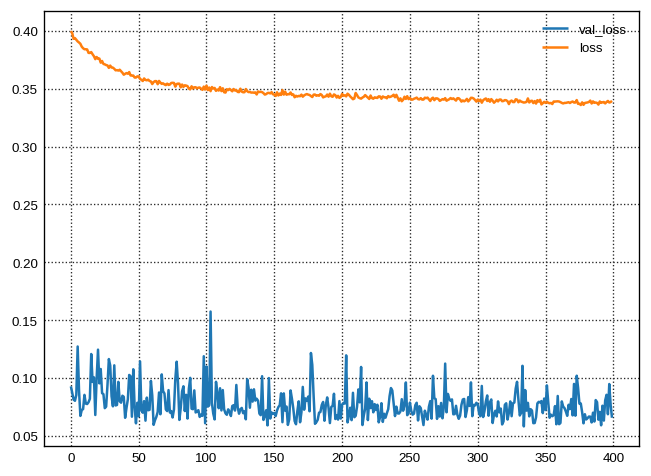

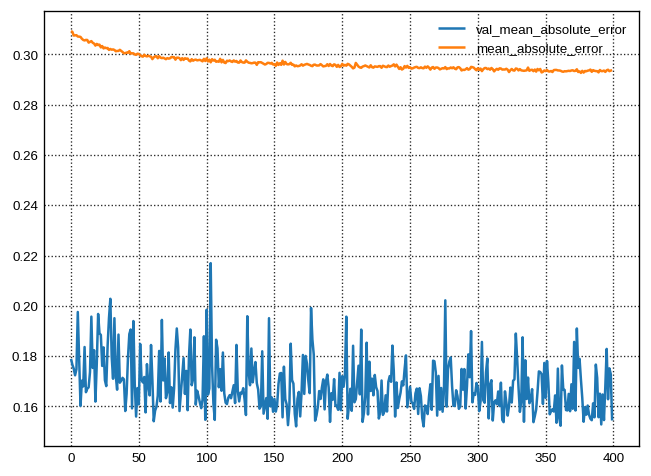

In [114]:
plt.figure(figsize=(6.4, 4.8), dpi=120)
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['loss'], label='loss')
# plt.ylim(0.05, 0.1)
plt.legend()
plt.figure(figsize=(6.4, 4.8), dpi=120)
plt.plot(history.history['val_mean_absolute_error'], label='val_mean_absolute_error')
plt.plot(history.history['mean_absolute_error'], label='mean_absolute_error')
# plt.ylim(0, 0.1)
plt.legend()

In [115]:
predict_Y_dnn = model.predict(test_X_nn)

In [116]:
mae = mean_absolute_error(test_Y, predict_Y_dnn)
mse = mean_squared_error(test_Y, predict_Y_dnn)
print(mae)
print(mse)

0.15441473
0.06588121


In [117]:
# 去除预测结果中含无效值（<=0）的光谱
predict_Y_dnn_tmp = predict_Y_dnn.copy()
test_Y_dnn_tmp = test_Y.copy()
predict_Y_dnn_tmp = pd.DataFrame(predict_Y_dnn_tmp)
test_Y_dnn_tmp = pd.DataFrame(test_Y_dnn_tmp)
print(predict_Y_dnn_tmp.shape)
print(test_Y_dnn_tmp.shape)
index = predict_Y_dnn_tmp <=0
predict_Y_dnn_tmp[index] = np.nan
test_Y_dnn_tmp[index] = np.nan
predict_Y_dnn_tmp = predict_Y_dnn_tmp.dropna(axis=0)
test_Y_dnn_tmp = test_Y_dnn_tmp.dropna(axis=0)
print(predict_Y_dnn_tmp.shape)
print(test_Y_dnn_tmp.shape)

predict_Y_dnn_tmp = np.array(predict_Y_dnn_tmp)
test_Y_dnn_tmp = np.array(test_Y_dnn_tmp)

(605416, 1158)
(605416, 1158)
(604046, 1158)
(604046, 1158)


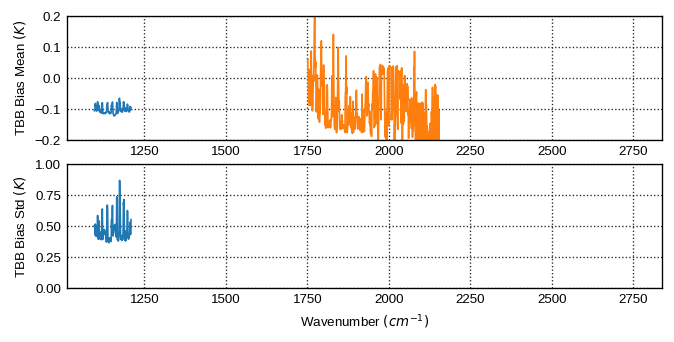

>>> Result/650.0_1095.0_1210.0_1750.0_2155.0_2550.0_1095.625_1209.375_1750.625_2154.375_2550.625_2755.0_dnn/0000_650.0_1095.0_1210.0_1750.0_2155.0_2550.0_1095.625_1209.375_1750.625_2154.375_2550.625_2755.0_dnn.png


In [118]:
out_file = '0000_' + '_'.join([str(j) for i in (ranges_X + ranges_Y) for j in i]) + "_dnn" + '.png'

result_dir = 'Result/' + '_'.join([str(j) for i in (ranges_X + ranges_Y) for j in i]) + "_dnn"
if not os.path.isdir(result_dir):
    os.mkdir(result_dir)

out_file = os.path.join(result_dir, out_file)
test_Y_tbb_dnn_tmp = rad2tbb(test_Y_dnn_tmp, wavenumber_Y)
predict_Y_tbb_dnn_tmp = rad2tbb(predict_Y_dnn_tmp, wavenumber_Y)
plot_model_validate(test_Y_tbb_dnn_tmp, predict_Y_tbb_dnn_tmp, wavenumber_Y, index_Y, out_file)

In [119]:
test_X_tbb_dnn = rad2tbb(test_X, wavenumber_X)
test_Y_tbb_dnn = rad2tbb(test_Y, wavenumber_Y)
predict_Y_tbb_dnn = rad2tbb(predict_Y_dnn, wavenumber_Y)

/home/cali/src/gap_filling/util.py:57: RuntimeWarning: invalid value encountered in log
  tbb = (c2 * center_wave) / np.log(1 + ((c1 * center_wave ** 3) / radiance))


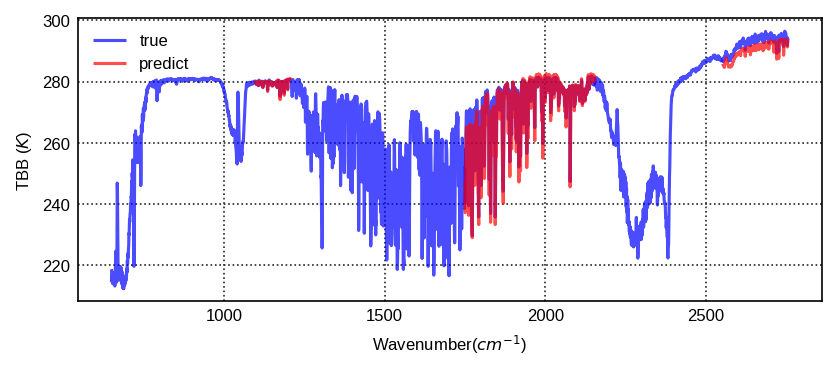

Result/650.0_1095.0_1210.0_1750.0_2155.0_2550.0_1095.625_1209.375_1750.625_2154.375_2550.625_2755.0_dnn/s_0000_00.png


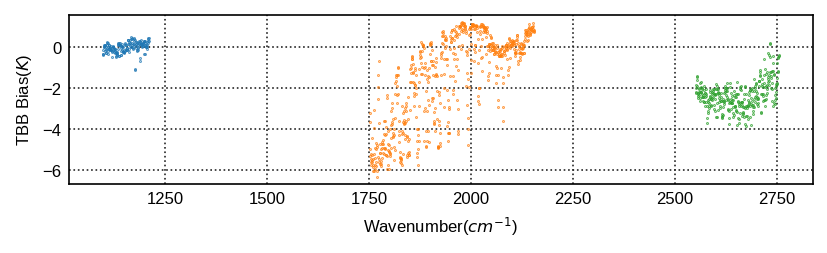

Result/650.0_1095.0_1210.0_1750.0_2155.0_2550.0_1095.625_1209.375_1750.625_2154.375_2550.625_2755.0_dnn/s_0000_01.png


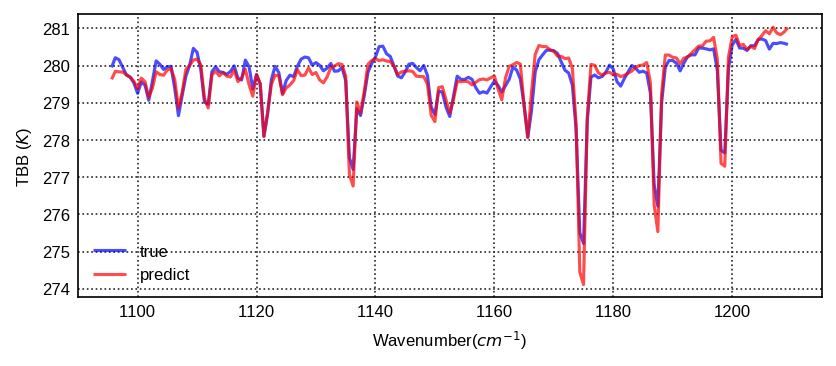

Result/650.0_1095.0_1210.0_1750.0_2155.0_2550.0_1095.625_1209.375_1750.625_2154.375_2550.625_2755.0_dnn/s_0000_02.png


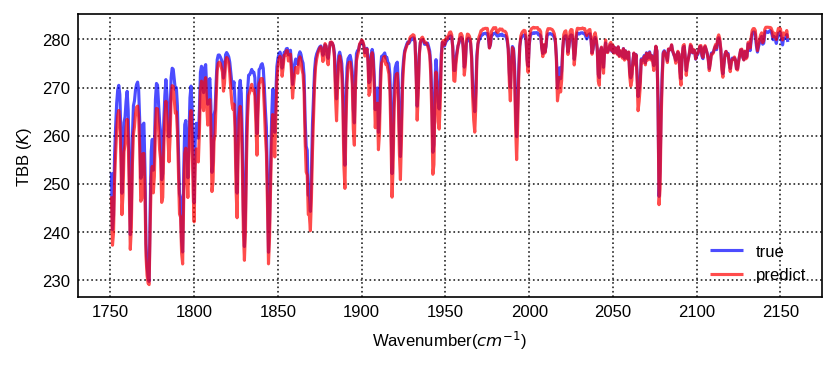

Result/650.0_1095.0_1210.0_1750.0_2155.0_2550.0_1095.625_1209.375_1750.625_2154.375_2550.625_2755.0_dnn/s_0000_03.png


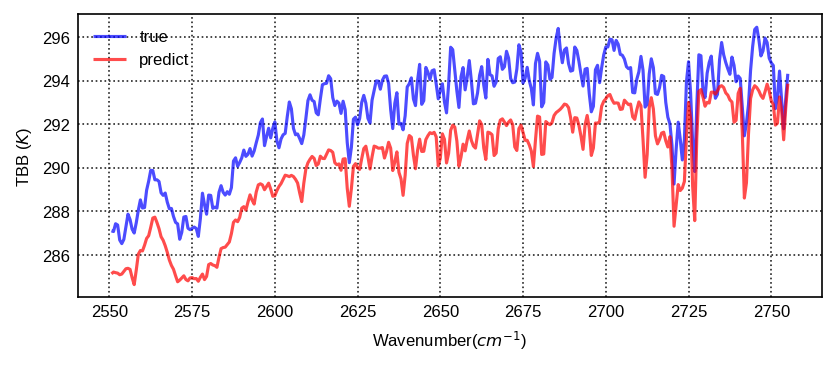

Result/650.0_1095.0_1210.0_1750.0_2155.0_2550.0_1095.625_1209.375_1750.625_2154.375_2550.625_2755.0_dnn/s_0000_04.png


In [129]:
alpha = 0.7

result_dir = 'Result/' + '_'.join([str(j) for i in (ranges_X + ranges_Y) for j in i]) + "_dnn"
if not os.path.isdir(result_dir):
    os.mkdir(result_dir)

file_name = result_dir + '/s_{:04d}_{:02d}.png'

figsize1 = (6.4, 2.5)
figsize2 = (6.4, 1.5)

for data_number in range(0, 1):
    count = 0
    fig = plt.figure(figsize=figsize1, dpi=150)
    plot_true_label = False
    plot_predict_label = False
    for s, e in index_X:
        plt.plot(wavenumber_X[s: e], test_X_tbb_dnn[data_number][s: e], c='b', alpha=alpha)
    for s, e in index_Y:
        if plot_true_label:
            label=None
        else:
            label='true'
        plt.plot(wavenumber_Y[s: e], test_Y_tbb_dnn[data_number][s: e], c='b', alpha=alpha, label=label)
        plot_true_label = True
    for s, e in index_Y:
        if plot_predict_label:
            label=None
        else:
            label='predict'
        plt.plot(wavenumber_Y[s: e], predict_Y_tbb_dnn[data_number][s: e], c='r', alpha=alpha, label=label)
        plot_predict_label = True
    plt.xlabel('Wavenumber($cm^{-1}$)')
    plt.ylabel('TBB ($K$)')
    plt.legend()
    plt.show()
    fig.savefig(file_name.format(data_number, count), dpi=150)
    print(file_name.format(data_number, count))
    count += 1

    fig = plt.figure(figsize=figsize2, dpi=150)
    for s, e in index_Y:
        tbb_bias = predict_Y_tbb_dnn[data_number][s: e] - test_Y_tbb_dnn[data_number][s: e]
        plt.scatter(wavenumber_Y[s: e], tbb_bias, s=0.1)
        plt.xlabel('Wavenumber($cm^{-1}$)')
        plt.ylabel('TBB Bias($K$)')
    plt.show()
    fig.savefig(file_name.format(data_number, count), dpi=150)
    print(file_name.format(data_number, count))
    count += 1
    
    for s, e in index_Y:
        fig = plt.figure(figsize=figsize1, dpi=150)
        plt.plot(wavenumber_Y[s: e], test_Y_tbb_dnn[data_number][s: e], c='b', alpha=alpha, label='true')
        plt.plot(wavenumber_Y[s: e], predict_Y_tbb_dnn[data_number][s: e], c='r', alpha=alpha, label='predict')
        plt.xlabel('Wavenumber($cm^{-1}$)')
        plt.ylabel('TBB ($K$)')
        plt.legend()
        plt.show()
        fig.savefig(file_name.format(data_number, count), dpi=150)
        print(file_name.format(data_number, count))
        count += 1